In [2435]:
import numpy as np
def regularize(x,t,T):
    m = np.diff(x)/np.diff(t)                             # Slopes of the different increments 
    t_r = np.arange(T)                                    # Regular times
    x_r = np.zeros(len(t_r))                              # Regularized position array 
    s = 0                                                 # Section number
    for i in range(len(t)-1):
        f = np.where(t_r < t[i+1])[0][-1]                 # Find the end of the segment that the values are to be assigned
        x_r[s:f+1] = x[i] + m[i] * (t_r[s:f+1]-t[i])      # Assign the values of the segment
        s = f+1                                           # Assign the beginning of the next segment 
    return(x_r)

In [2436]:
def normalize(x_nn):
    """
    Function to normalize a regular trajectory.
    
    Parameters
    ==========
    x_nn : Trajectory (x component) non-nrmalized.
    """
    x = np.zeros(np.size(x_nn))
    dx = x_nn[1:] - x_nn[0:-1]
    
    sigma = np.std(dx**2)
    
    x = x_nn[0] + np.cumsum(dx / sigma)
    
    mu = np.mean(x)
    
    x -= mu
        
    return x

## P1

In [2437]:
def lw_1D(T,alpha,v):
    import numpy as np
    x = []
    t = []
    x.append(0)
    t.append(0)
    #Continue until the previous time exceeds the duration
    while t[-1]<T:
        dt = np.random.rand()**(-1/(3-alpha))        
        t.append(t[-1] + dt)
        w = np.random.choice([-1,1])
        x.append(x[-1] + v*w*dt)  
    x = regularize(x,t,T)
    return(x)

In [ ]:
duration = 1000
v = 1 # constant velocity
alpha = 2
runs = 5
trajectories = np.zeros((runs,duration)) #row 1 is x, row 2 is time. 
for run in range(runs):
    x = lw_1D(duration,alpha,v)
    trajectories[run] = x


normalize function changes length of x_r with -1. So instead of changing the functions given i the lecture, i overwrite all elements after the first one, and then also plots all elements after the first one. 

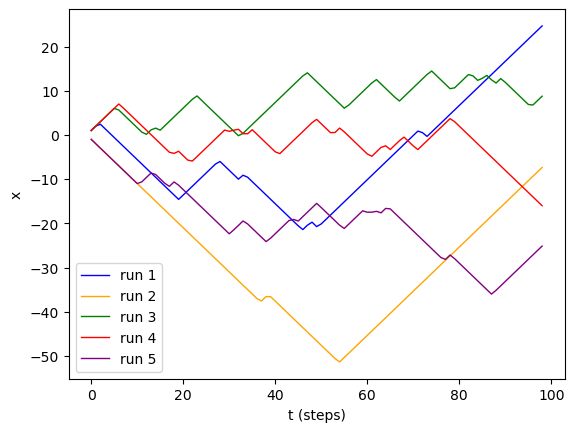

In [2439]:
import matplotlib.pyplot as plt
colors = ['blue', 'orange', 'green', 'red', 'purple']
for run in range(runs):
    plt.plot(trajectories[run][1:], '-', color=colors[run], linewidth=1, label=f'run {run+1}')
plt.legend()
plt.xlabel('t (steps)')
plt.ylabel('x')
plt.show()

## P2

In [2440]:
def lw_2D(T,alpha,v):
    import numpy as np
    t = []
    x = []
    y = []
    x.append(0)
    y.append(0)
    t.append(0)
    while t[-1]<T:
        dt = np.random.rand()**(-1/(3-alpha))          
        t.append(t[-1] + dt)
        phi = np.random.rand()*2*np.pi
        x.append(x[-1] + v*np.cos(phi)*dt)              
        y.append(y[-1] + v*np.sin(phi)*dt)               
    x = regularize(x,t,T)
    y = regularize(y,t,T)
    return(x,y)

In [ ]:
duration = 1000
v = 1 # constant velocity
alpha = 2
runs = 5
trajectories = np.zeros((2,runs,duration)) #row 0 is x, row 1 y. 
for run in range(runs):
    x,y = lw_2D(duration,alpha,v)
    trajectories[0][run] = x
    trajectories[1][run] = y

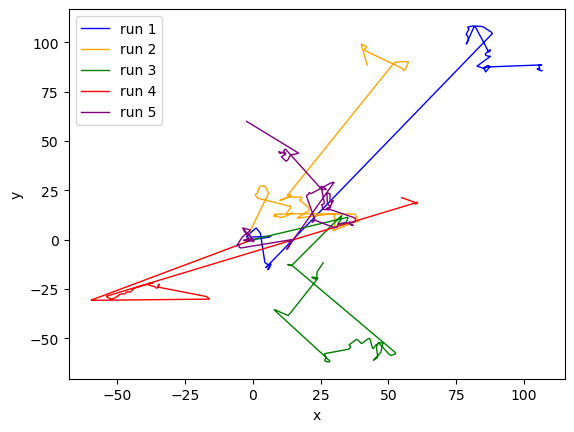

In [2442]:
import matplotlib.pyplot as plt
colors = ['blue', 'orange', 'green', 'red', 'purple']
for run in range(runs):
    plt.plot(trajectories[0][run][1:],trajectories[1][run][1:], '-', color=colors[run], linewidth=1, label=f'run {run+1}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## P3

In [2443]:
def tMSD_1d(x, L):
    """
    Function to calculate the tMSD.
    
    Parameters
    ==========
    x : Trajectory (x component).
    L : Indicates the maximum delay (L * dt) considered.
    """

    tmsd = np.zeros(L)
    
    nelem = np.size(x)

    for n in range(L):
        Nmax = nelem - n
        dx = x[n:nelem] -  x[0: Nmax]
        tmsd[n] += np.mean(dx ** 2)

    return tmsd

In [2444]:
def eMSD_1d(x):
    """
    Function to calculate the eMSD.
    
    Parameters
    ==========
    x : Trajectories: x[n_traj, i], bidimensional array.
    """

    N_traj, N_steps = x.shape
    
    # emsd = np.zeros(N_steps)
    
    emsd = np.mean(
        (x - np.repeat(x[:, 0].reshape(N_traj, 1), N_steps, axis=1)) ** 2,
        axis=0
    )
    
    return emsd